<a href="https://colab.research.google.com/github/priyantynurul/Learning-Data-Science/blob/main/Data_Visualization_Waffle%2C_WordCloud%2C_RegPlot%2C_and_FoliumMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 565 kB 4.4 MB/s 


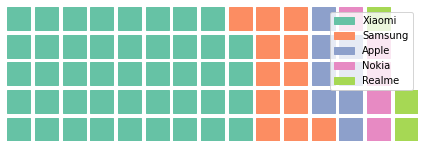

In [3]:
# Visualizing serial data using Waffle graph
!pip install pywaffle
from pywaffle import Waffle

data = {'phone': ['Xiaomi', 'Samsung', 'Apple', 'Nokia', 'Realme'],
        'stock': [44, 12, 8, 5, 3]
        }

df = pd.DataFrame(data)
fig = plt.figure(
    FigureClass = Waffle,
    rows = len(df),
    values = df.stock,
    labels = list(df.phone)
)

In [4]:
# Visualizing most frequent word using word cloud
from wordcloud import WordCloud, ImageColorGenerator

df_news = pd.read_csv('/content/news.csv')
df_news.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [6]:
df_news.shape

(5200, 4)

In [7]:
df_news.author

0              David Streitfeld
1                           NaN
2                 Common Dreams
3                 Daniel Victor
4       Truth Broadcast Network
                 ...           
5195                 Jody Rosen
5196        Sheryl Gay Stolberg
5197               Mike McPhate
5198                        NaN
5199                Teddy Wayne
Name: author, Length: 5200, dtype: object

In [8]:
type(df_news.author.unique()[0])

str

In [9]:
for author in df_news.author.unique():
  print(type(author))
  # there's an author that has type float, weird :(

<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<cla

In [10]:
df_news.author.unique()[1]

nan

In [11]:
df_news = df_news.fillna('')
df_news.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [12]:
text = " ".join(str(author) for author in df_news.author.unique() if len(author)>3)
text

"David Streitfeld Common Dreams Daniel Victor Truth Broadcast Network Pam Key Trevor Loudon cognitive dissident Dr. Eowyn Doug Diamond Shaun Bradley Steve Watson Usa News Flash Melissa Eddy Ken Belson and Ben Shpigel Tom Ciccotta Jason Easley Bryant Rousseau REALdeal Dale Johnson Andrew Anglin James Fulford Holland Cotter Sam J. Maggie Haberman and Thomas Kaplan Matthew Goldstein, Rachel Abrams and Ben Protess Жанна Ивченко UnReal Mama James Poniewozik Mark Mazzetti Barbara Crossette Ian Hanchett Kevin Gosztola Andrew Napolitano Dan Bilefsky Robin Pogrebin Doctor Who? Michael D. Shear Sabrina Tavernise Rakiha geevinda Neil W. McCabe Nick Cumming-Bruce and Eric Schmitt Marietta Peverelli Jeremy Egner Erica L. Green Iron Sheik Eric Schmitt Activist Post Yamiche Alcindor A.O. Scott Mujib Mashal Gilad Atzmon Joe Wolverton, II, J.D. Anonymous Warner Todd Huston Bill Quigley The Daily Sheeple Rowan Wolf Jacob Hornberger Charlie Spiering Christina Sarich André du Pôle Charles McDermid Sam Sif

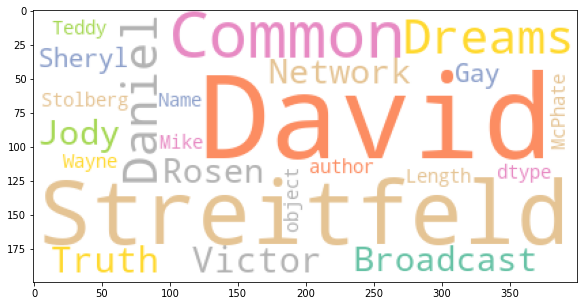

In [13]:
df_news['author'] = str(df_news['author'])
text = " ".join(str(author) for author in df_news.author.unique() if len(author)>3)
wordcloud = WordCloud(max_words=50, colormap='Set2',
                      background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.show()

In [14]:
# Visualizing the correlation between engine-size and price using regression plot
import seaborn as sns

df_sales = pd.read_csv('/content/Car_sales.csv')
df_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [26]:
df_sales['Engine_size'] = df_sales['Engine_size'].fillna(0)
df_sales['Engine_size'] = df_sales['Engine_size'].astype('int64')

df_sales['Price_in_thousands'] = df_sales['Price_in_thousands'].fillna(0)
df_sales['Price_in_thousands'] = df_sales['Price_in_thousands'].astype('int64')
df_sales.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands       int64
Engine_size              int64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [24]:
df_sales['Engine_size'].isnull().sum()

1

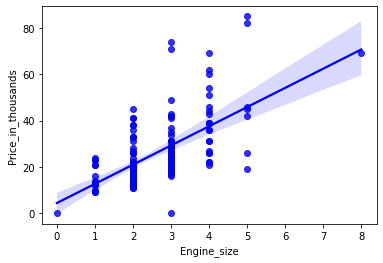

In [28]:
sns.regplot(x='Engine_size', y='Price_in_thousands', data=df_sales, color='blue', marker='o')

In [29]:
# Visualizing map using Folium library
import folium
map = folium.Map(location=[-6.385337203409723,
                         106.77999697554567], zoom_start=17, tiles='Stamen Terrain')
folium.Marker([-6.380520, 106.780123], popup='depok').add_to(map)
map